# Time Series Analysis

There are two columns in this dataset, "Date" and "Daily total female births in California, 1959". This univariate time series dataset describes the number of daily female births in California in 1959.

Reference:  [Jason Brownlee: Time Series analysis with Python](http://machinelearningmastery.com/time-series-data-visualization-with-python/)

In [96]:
import pandas as pd
#series = pd.read_csv('daily-births.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
#The previous loading is to load as a series, rather than a dataframe.
series = pd.Series.from_csv("daily-births.csv", header = 0)

- header=0: We must specify the header information at row 0.
- parse_dates=[0]: We give the function a hint that data in the first column contains dates that need to be parsed. This argument takes a list, so we provide it a list of one element, which is the index of the first column.
- index_col=0: We hint that the first column contains the index information for the time series.
- squeeze=True: We hint that we only have one data column and that we are interested in a Series and not a DataFrame.

In [97]:
print (series.head(5))
print ("The shape:", series.shape)

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Daily total female births in California, 1959, dtype: int64
The shape: (365,)


You can see that each row has an associated date. This is in fact not a column, but instead a time index for value. As an index, there can be multiple values for one time, and values may be spaced evenly or unevenly across times.

In [98]:
print (series['1959-11'])

Date
1959-11-01    48
1959-11-02    49
1959-11-03    43
1959-11-04    42
1959-11-05    59
1959-11-06    45
1959-11-07    52
1959-11-08    46
1959-11-09    42
1959-11-10    40
1959-11-11    40
1959-11-12    45
1959-11-13    35
1959-11-14    35
1959-11-15    40
1959-11-16    39
1959-11-17    33
1959-11-18    42
1959-11-19    47
1959-11-20    51
1959-11-21    44
1959-11-22    40
1959-11-23    57
1959-11-24    49
1959-11-25    45
1959-11-26    49
1959-11-27    51
1959-11-28    46
1959-11-29    44
1959-11-30    52
Name: Daily total female births in California, 1959, dtype: int64


In [ ]:
from matplotlib import pyplot
series.plot()
pyplot.show()

## Minimum Daily Temperatures Dataset

This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.

The units are in degrees Celsius and there are 3,650 observations. The source of the data is credited as the Australian Bureau of Meteorology.

In [102]:
daily = pd.Series.from_csv('daily.csv')
print(daily.head())

1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
dtype: float64


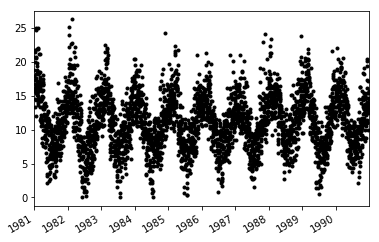

In [104]:
daily.plot(style = 'k.')
pyplot.show()

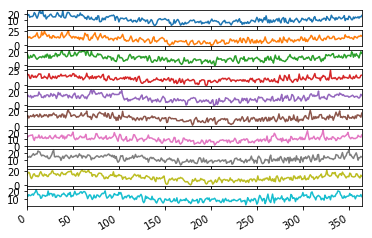

In [112]:
from pandas import TimeGrouper
groups = daily.groupby(TimeGrouper('A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots = True, legend = False)
pyplot.show()

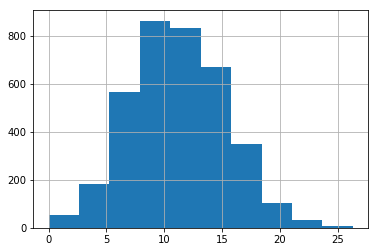

In [114]:
daily.hist()
pyplot.show()

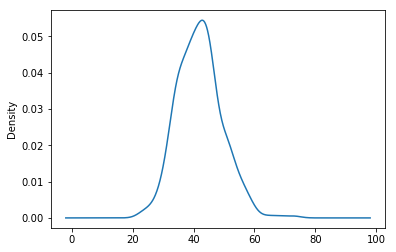

In [115]:
series.plot(kind='kde')
pyplot.show()

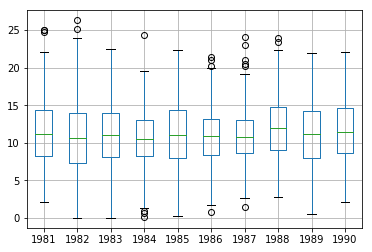

In [116]:
years.boxplot()
pyplot.show()

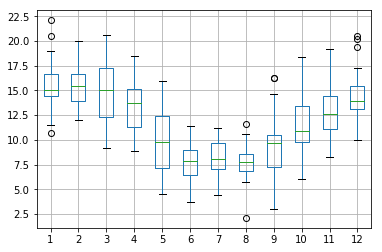

In [119]:
one_year = daily['1990']
groups = one_year.groupby(TimeGrouper('M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)
months.boxplot()
pyplot.show()

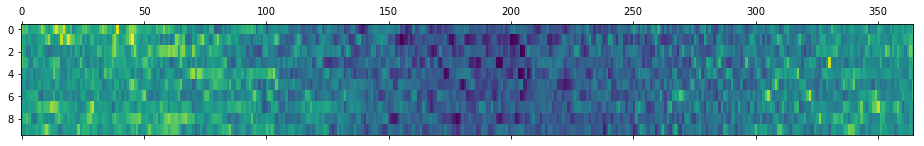

In [122]:
years = years.T
pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.show()

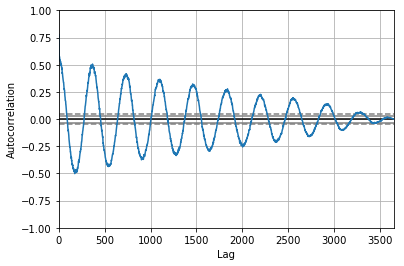

In [126]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(daily)
pyplot.show()

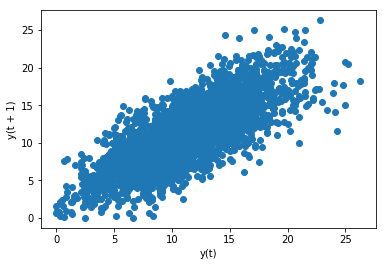

In [127]:
from pandas.plotting import lag_plot
lag_plot(daily)
pyplot.show()

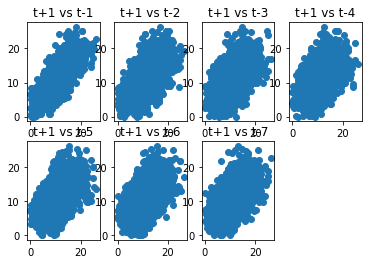

In [128]:
values = pd.DataFrame(daily.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t+1 vs t-' + str(i))
    pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()
